In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind,levene,shapiro,mannwhitneyu,wilcoxon,iqr
from statsmodels.stats.power import ttest_power
import scipy.stats as stats

In [19]:
golf_data = pd.read_excel('SM4-Golf.xls')

In [10]:
golf_data.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [12]:
golf_data.tail()

,Current,New
35,267,263
36,279,261
37,274,255
38,276,263
39,262,279


In [15]:
golf_data.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


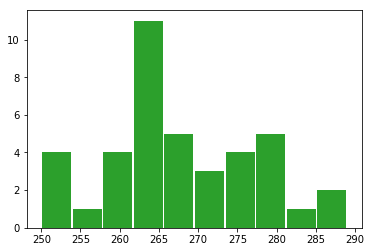

In [32]:
plt.hist(golf_data['New'],bins=10,rwidth=0.95)
plt.show()

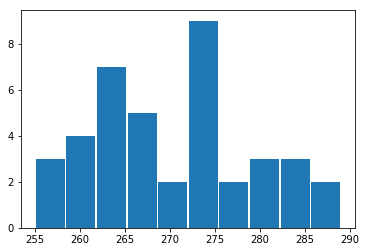

In [38]:
plt.hist(golf_data['Current'],bins=10,rwidth=0.95)
plt.show()

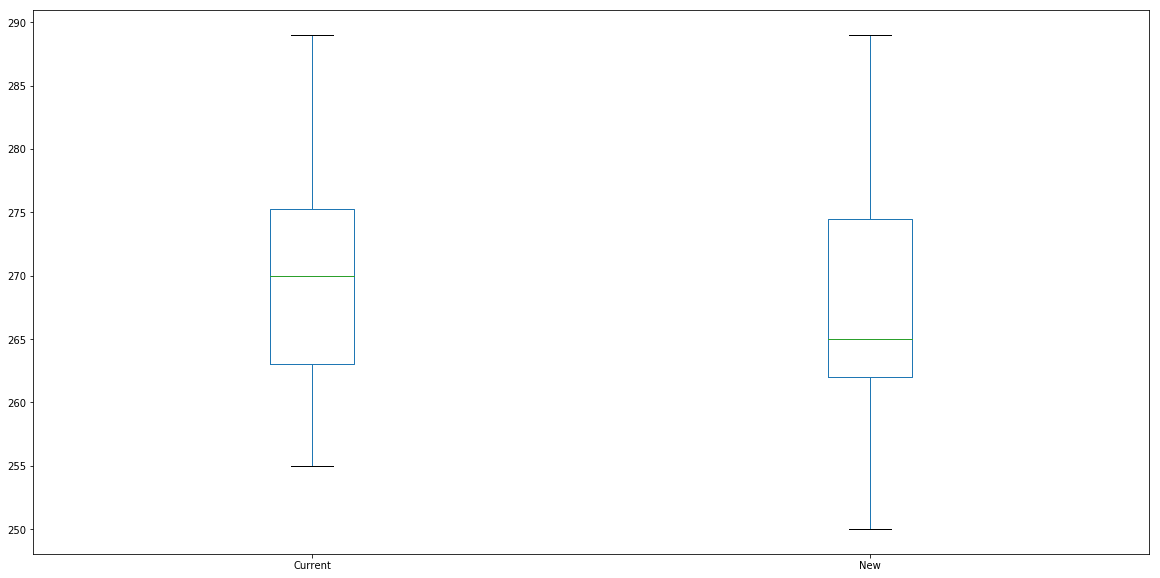

In [40]:
golf_data.plot(kind='Box',figsize=(20,10))
plt.show()

# There are no outliers in both the data for the Current and New golf balls

# Since the same test of driving distance is applied on two populations of Current and the new golf ball, the samples are classified under unpaired samples

In [42]:
Current = golf_data.iloc[:,0]

In [44]:
Current.head()

0    264
1    261
2    267
3    272
4    258
Name: Current, dtype: int64

In [46]:
#Get mean
meanC = Current.mean()
meanC

270.275

In [48]:
#Get variance
varC = Current.var()
varC

76.61474358974361

In [50]:
New = golf_data.iloc[:,1]

In [52]:
New.head()

0    277
1    269
2    263
3    266
4    262
Name: New, dtype: int64

In [54]:
#Get mean
meanN = New.mean()
meanN

267.5

In [55]:
#Get variance
varN= New.var()
varN

97.94871794871794

In [57]:
# The null hypothesis is that the driving distance of current ball is less than or equal to new ball and 
# alternate hypothesis is that the driving distance of Current ball is greater than the new ball 

In [59]:
# Checking if parametric or non parametric by Shapiro Test

shapiro(Current)

(0.9707046747207642, 0.378787100315094)

In [60]:
shapiro(New)

(0.9678263664245605, 0.3064655363559723)

In [61]:
# P value of shapiro test is greater than 0.05, the null hypothesis of shapiro test that the sample is drawn from the population following normal distribution cannot be rejected.

In [64]:
# t sample testing of the hypothesis
t_statistic,p_value = ttest_ind(Current,New)
print(t_statistic,p_value)

1.32836159352 0.187932284919


In [65]:
# required probability = 0.1879/2=0.0989
# As p>0.05, null hypothesis is not rejected

In [67]:
# Levene test for check of variances of population
levene(Current,New)

LeveneResult(statistic=0.25532382917657409, pvalue=0.61477595233313087)

In [69]:
# As pvalue for levene's test > 0.05, the null hypothesis of levene test cannot be rejected

# Using pooled standard deviation to calculate DELTA value required for calculating power of test :

Pooledstd = np.sqrt(((40-1)*varC+ (40-1)*varN)/(40+40-2))
Pooledstd

9.3424692008714043

In [71]:
delta = (meanC - meanN)/Pooledstd
delta

0.29703068218208772

In [72]:
print(ttest_power(delta, nobs = 40, alpha = 0.05, alternative = 'larger'))

0.57964957992


In [73]:
print(ttest_power(delta, nobs = 72, alpha = 0.05, alternative = 'larger'))

0.802726448588


In [81]:
# Assuming non-parametic data(populations from which samples are drawn doesnot follow normal distribution)- 2 sample testing of unpaired data can be done by mannwhitneyu model

u,p_value = mannwhitneyu(Current,New,alternative = 'greater')
print(u,p_value)

932.0 0.102651921229


In [82]:
# probability is greater than 0.05 above, the Null hypothesis cannot be rejected

In [74]:
# Calculation of POWER OF TEST :

critical = stats.t.isf(0.05,76)
critical

1.6651513533271274

In [75]:
delta1 = critical - t_statistic
delta1

0.33678975980255954

In [76]:
print(ttest_power(delta1, nobs = 40, alpha = 0.05, alternative = 'larger'))

0.672926660792


In [78]:
#as per power of test - there is only 67.29% of the chance that the rejected null hypothesis is actually false.

print(ttest_power(delta1, nobs = 56, alpha = 0.05, alternative = 'larger'))

0.800735076945
